# RNN Based Models

## Simple RNN Model

In [50]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Embedding,Dropout,SimpleRNN,Dense,Activation
from keras.utils.np_utils import to_categorical
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [51]:
text = '''sam is red
hannah not red
hannah is green
bob is green
bob not red
sam not green
sarah is red
sarah not green
'''
sentences = text.rstrip().split('\n')

In [52]:
lemma = lambda x: x.strip().lower().split(' ')
sentences_lemmatized  = [lemma(sentence) for sentence in sentences]

In [53]:
words = set(itertools.chain(*sentences_lemmatized))

In [54]:
word_to_int = dict((w,i) for i,w in enumerate(words))
int_to_word = list(words)
print int_to_word
print word_to_int

['sarah', 'sam', 'hannah', 'is', 'green', 'not', 'bob', 'red']
{'sarah': 0, 'sam': 1, 'hannah': 2, 'is': 3, 'green': 4, 'not': 5, 'bob': 6, 'red': 7}


In [55]:
sentences_indexed = [[word_to_int[word] for word in sentence] for sentence in sentences_lemmatized]
sentences_array = np.asarray(sentences_indexed,dtype = 'int32')

In [56]:
is_green = np.asarray([[0, 1, 1, 1, 1, 0, 0, 0]], dtype='int32').T
is_green_cat = to_categorical(is_green)

In [57]:
sentence_maxlen = 3
n_words = len(words)
n_embed_dims = 3

In [58]:
model = Sequential()
model.add(Embedding(n_words,n_embed_dims,input_length = sentence_maxlen))
model.add(SimpleRNN(n_embed_dims,return_sequences = True,input_shape = (sentence_maxlen,n_embed_dims)))
model.add(Dropout(0.25))
model.add(SimpleRNN(32,return_sequences = False))
model.add(Dropout(0.25))
model.add(Dense(2))
model.add(Activation('softmax'))

In [59]:
#input_sentence = Input(shape=(sentence_maxlen,), dtype='int32')
#input_embedding = Embedding(n_words,n_embed_dims)(input_sentence)
#color_prediction = SimpleRNN(1)(input_embedding)
#predict_green = Model(input=[input_sentence], output=[color_prediction])

In [60]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adagrad',metrics = ['accuracy'])

In [61]:
hist = model.fit([sentences_array],[is_green_cat],nb_epoch = 5000,batch_size=32,verbose = 0)

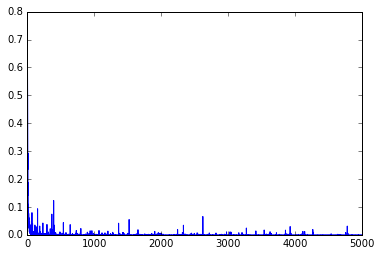

In [62]:
info = hist.history
plt.plot(info['loss'])

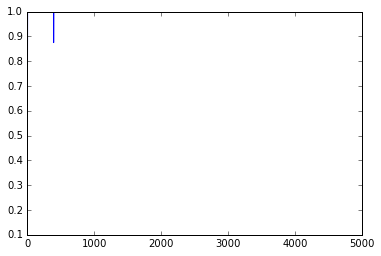

In [63]:
plt.plot(info['acc'])

In [64]:
test = '''
hannah not red
hannah is red
'''.strip().split('\n')
print test

['hannah not red', 'hannah is red']


In [65]:
sentences_test = [lemma(sentence) for sentence in test]
print sentences_test

[['hannah', 'not', 'red'], ['hannah', 'is', 'red']]


In [66]:
test_array = [[word_to_int[word] for word in sent] for sent in sentences_test]
print test_array

[[2, 5, 7], [2, 3, 7]]


In [67]:
test_array = np.asarray(test_array,dtype='int64')
print type(test_array)

<type 'numpy.ndarray'>


In [68]:
yPred = model.predict_classes(test_array,batch_size=32,verbose=1)

2/2 [==============================] - 0s


In [69]:
print yPred

[1 1]
